# Melbourne_housing

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import OneHotEncoder

## inspecting Data

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [4]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


### Something is wrong!!!  
### since the max number of Bedroom2 = 30 , Bathroom = 12 and Rooms = 16?!!!
### Max of year build is 2106!!

In [5]:
df.select_dtypes("object").nunique()

Suburb           351
Address        34009
Type               3
Method             9
SellerG          388
Date              78
CouncilArea       33
Regionname         8
dtype: int64

In [6]:
print(f'Types: {df.Type.unique()}')
print(f'Methods: {df.Method.unique()}')
print(f'Regionname: {df.Regionname.unique()}')

Types: ['h' 'u' 't']
Methods: ['SS' 'S' 'VB' 'SP' 'PI' 'SN' 'W' 'PN' 'SA']
Regionname: ['Northern Metropolitan' 'Western Metropolitan' 'Southern Metropolitan'
 'Eastern Metropolitan' 'South-Eastern Metropolitan' 'Eastern Victoria'
 'Northern Victoria' 'Western Victoria' nan]


In [7]:
df.select_dtypes('object')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,Abbotsford,68 Studley St,h,SS,Jellis,3/09/2016,Yarra City Council,Northern Metropolitan
1,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra City Council,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra City Council,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,u,VB,Rounds,4/02/2016,Yarra City Council,Northern Metropolitan
4,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan
...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,h,PI,Jas,24/02/2018,Maribyrnong City Council,Western Metropolitan
34853,Yarraville,29A Murray St,h,SP,Sweeney,24/02/2018,Maribyrnong City Council,Western Metropolitan
34854,Yarraville,147A Severn St,t,S,Jas,24/02/2018,Maribyrnong City Council,Western Metropolitan
34855,Yarraville,12/37 Stephen St,h,SP,hockingstuart,24/02/2018,Maribyrnong City Council,Western Metropolitan


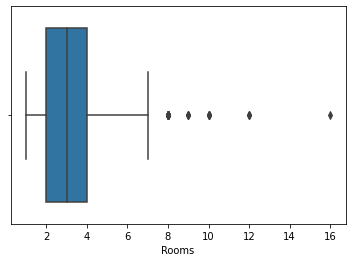

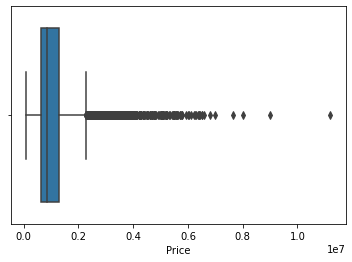

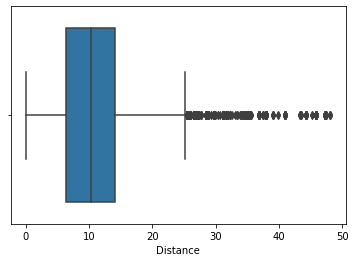

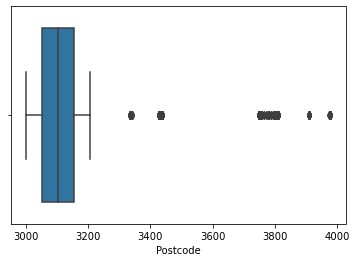

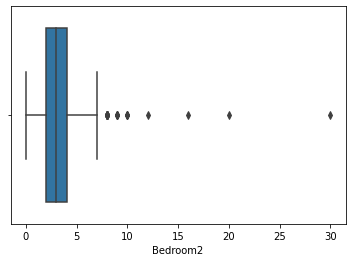

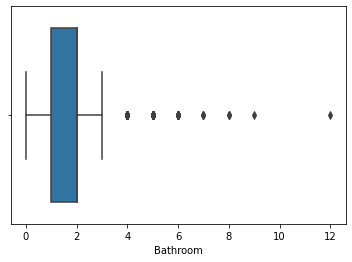

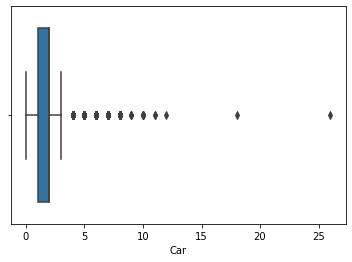

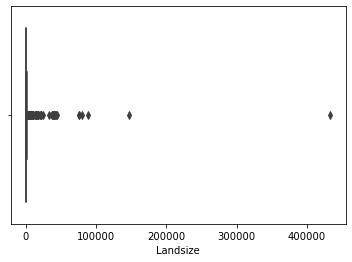

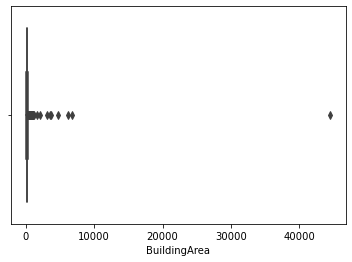

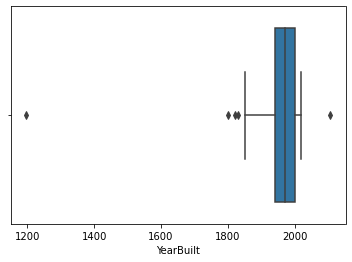

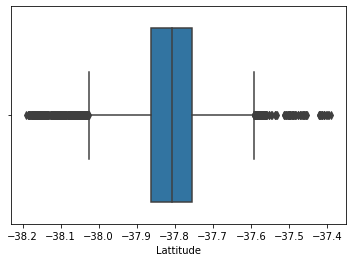

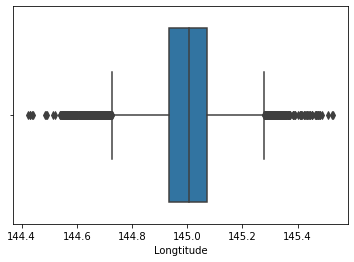

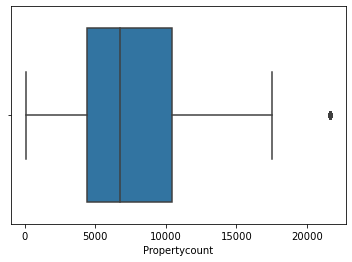

In [8]:
for i in df.columns:
    if df[i].dtype != 'object':
        bp = sns.boxplot(data=df ,x=df[i])
        plt.show()

## Multicollinearity

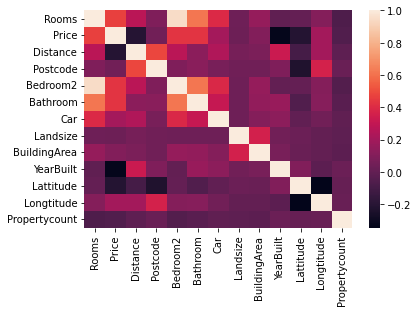

Rooms            0.465238
Price            1.000000
Distance        -0.211384
Postcode         0.044950
Bedroom2         0.430275
Bathroom         0.429878
Car              0.201803
Landsize         0.032748
BuildingArea     0.100754
YearBuilt       -0.333306
Lattitude       -0.215607
Longtitude       0.197874
Propertycount   -0.059017
Name: Price, dtype: float64

In [9]:
corr= df.corr()
sns.heatmap(corr)
plt.show();

df.corr()['Price']

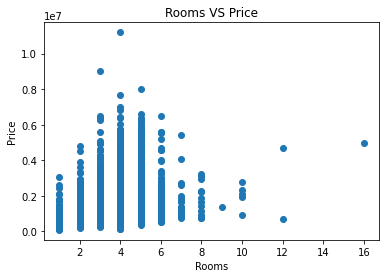

0.4652383451075967

In [10]:
plt.scatter(x= df['Rooms'],y=df['Price'])
plt.xlabel("Rooms")
plt.ylabel("Price")
plt.title("Rooms VS Price")
plt.show();

df.Rooms.corr(df.Price)

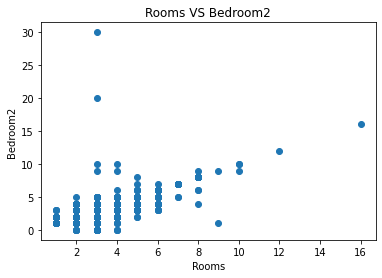

0.9467546231299149

In [11]:
plt.scatter(x= df['Rooms'],y=df['Bedroom2'])
plt.xlabel("Rooms")
plt.ylabel("Bedroom2")
plt.title("Rooms VS Bedroom2")
plt.show();

df.Rooms.corr(df.Bedroom2)

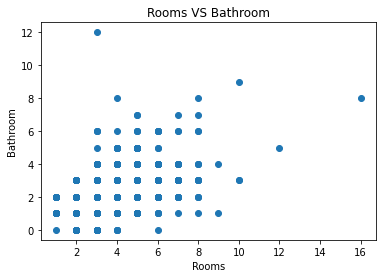

0.6118258594416497

In [12]:
plt.scatter(x= df['Rooms'],y=df['Bathroom'])
plt.xlabel("Rooms")
plt.ylabel("Bathroom")
plt.title("Rooms VS Bathroom")
plt.show();

df.Rooms.corr(df.Bathroom)

## Data Preprocessing

In [13]:
df.duplicated().sum()

1

In [14]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [17]:
df.shape

(34856, 21)

In [18]:
df[df.YearBuilt == 2106]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2453,Bulleen,3 Maringa St,4,h,NaN,SP,Ray,7/11/2016,11.8,3105.0,...,2.0,2.0,729.0,255.0,2106.0,Manningham City Council,-37.7637,145.0881,Eastern Metropolitan,4480.0


In [19]:
df.drop(df[df['YearBuilt'] == 2106].index,inplace=True)
df[df.YearBuilt == 2106]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34855 entries, 0 to 34855
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34855 non-null  object 
 1   Address        34855 non-null  object 
 2   Rooms          34855 non-null  int64  
 3   Type           34855 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34855 non-null  object 
 6   SellerG        34855 non-null  object 
 7   Date           34855 non-null  object 
 8   Distance       34854 non-null  float64
 9   Postcode       34854 non-null  float64
 10  Bedroom2       26638 non-null  float64
 11  Bathroom       26629 non-null  float64
 12  Car            26127 non-null  float64
 13  Landsize       23045 non-null  float64
 14  BuildingArea   13740 non-null  float64
 15  YearBuilt      15549 non-null  float64
 16  CouncilArea    34852 non-null  object 
 17  Lattitude      26879 non-null  float64
 18  Longti

In [21]:
df.Date.nunique()

78

In [22]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7608
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

### Drop columns Landsize , BuildingArea , YearBuilt 

In [23]:
df.drop(columns=['YearBuilt','BuildingArea','Landsize'],inplace=True)

In [24]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            7608
Method              0
SellerG             0
Date                0
Distance            1
Postcode            1
Bedroom2         8217
Bathroom         8226
Car              8728
CouncilArea         3
Lattitude        7976
Longtitude       7976
Regionname          3
Propertycount       3
dtype: int64

In [25]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Lattitude,Longtitude,Propertycount
count,34855.000000,2.724700e+04,34854.000000,34854.000000,26638.000000,26629.000000,26127.000000,26879.000000,26879.000000,34852.000000
mean,3.030986,1.050173e+06,11.184791,3116.062747,3.084616,1.624732,1.728825,-37.810635,145.001842,7573.051647
std,0.969947,6.414671e+05,6.789049,109.026985,0.980710,0.724187,1.010807,0.090282,0.120168,4428.164474
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,-37.754085,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,-37.390200,145.526350,21650.000000


In [26]:
df[df.Regionname.isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18522,Footscray,2/16 Stafford St,2,u,710000.0,S,Jas,15/07/2017,5.1,3011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26887,Camberwell,2/3 Kingsley St,2,h,825000.0,VB,Jellis,11/11/2017,7.7,3124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29482,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df[df.Bedroom2.isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,8/10/2016,2.5,3067.0,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
16,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,8/10/2016,2.5,3067.0,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
19,Abbotsford,403/609 Victoria St,2,u,542000.0,S,Dingle,8/10/2016,2.5,3067.0,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
21,Abbotsford,25/84 Trenerry Cr,2,u,760000.0,SP,Biggin,10/12/2016,2.5,3067.0,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
22,Abbotsford,106/119 Turner St,1,u,481000.0,SP,Purplebricks,10/12/2016,2.5,3067.0,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34837,Williamstown,11/81 Melbourne Rd,2,u,450000.0,SP,Raine,24/02/2018,6.8,3016.0,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
34838,Williamstown,24/18 Station Rd,2,u,475000.0,SP,Greg,24/02/2018,6.8,3016.0,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
34839,Williamstown,3/2 Thompson St,2,u,520000.0,VB,Raine,24/02/2018,6.8,3016.0,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
34843,Windsor,4/16 Lewisham Rd,1,u,440000.0,SP,Biggin,24/02/2018,4.6,3181.0,NaN,NaN,NaN,Port Phillip City Council,NaN,NaN,Southern Metropolitan,4380.0


### We can drop columns Bathroom and Bedroom2 
### 1-since the corr between them and Rooms is very high (Multicollinearity)
### 2-There are many values missing
### 3- the max number of Bedroom2 = 30 , Bathroom = 12 and Rooms = 16 !!!

In [28]:
df.drop(columns=['Bathroom','Bedroom2'],inplace=True)
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            7608
Method              0
SellerG             0
Date                0
Distance            1
Postcode            1
Car              8728
CouncilArea         3
Lattitude        7976
Longtitude       7976
Regionname          3
Propertycount       3
dtype: int64

In [29]:
df.describe()

,Rooms,Price,Distance,Postcode,Car,Lattitude,Longtitude,Propertycount
count,34855.000000,2.724700e+04,34854.000000,34854.000000,26127.000000,26879.000000,26879.000000,34852.000000
mean,3.030986,1.050173e+06,11.184791,3116.062747,1.728825,-37.810635,145.001842,7573.051647
std,0.969947,6.414671e+05,6.789049,109.026985,1.010807,0.090282,0.120168,4428.164474
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,1.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,2.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,2.000000,-37.754085,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,26.000000,-37.390200,145.526350,21650.000000


In [30]:
df.fillna({
    'Price':df.Price.mean(),
    'Lattitude': df.Lattitude.mean(),
    'Longtitude': df.Longtitude.mean(),
    'Car': df.Car.mean()},inplace=True)

In [31]:
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         1
Postcode         1
Car              0
CouncilArea      3
Lattitude        0
Longtitude       0
Regionname       3
Propertycount    3
dtype: int64

In [32]:
df.select_dtypes("object").nunique()

Suburb           351
Address        34008
Type               3
Method             9
SellerG          388
Date              78
CouncilArea       33
Regionname         8
dtype: int64

### Drop columns: Suburb , Address ,Method ,SellerG , CouncilArea ,Postcode , Date

In [33]:
df.drop(columns=['Suburb','Address','Method','SellerG','CouncilArea','Postcode','Date','Propertycount'],axis=1,inplace=True)

In [34]:
df.isna().sum()

Rooms         0
Type          0
Price         0
Distance      1
Car           0
Lattitude     0
Longtitude    0
Regionname    3
dtype: int64

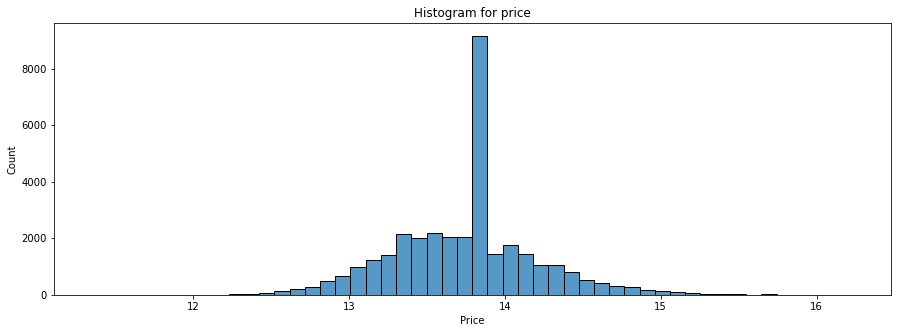

In [35]:
price_logs = np.log1p(df.Price)
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(price_logs, bins=50)
plt.title('Histogram for price')
plt.xlabel('Price');

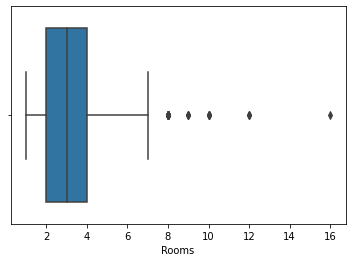

In [36]:
for i in df.columns:
    if i == 'Rooms':
        bp = sns.boxplot(data=df ,x=df[i])
        plt.show()

In [37]:
df[df.Rooms >= 4].sort_values(by='Car',ascending=False).head(20)

,Rooms,Type,Price,Distance,Car,Lattitude,Longtitude,Regionname
31863,5,h,1.050173e+06,5.4,12.0,-37.79534,145.03250,Southern Metropolitan
32861,4,h,7.880000e+05,14.0,11.0,-37.75612,144.80179,Western Metropolitan
4324,5,h,1.050173e+06,3.5,11.0,-37.78710,144.99250,Northern Metropolitan
29909,5,h,9.900000e+05,10.5,10.0,-37.79207,144.81960,Western Metropolitan
27881,6,h,1.050173e+06,37.5,10.0,-37.68820,144.49260,Western Victoria
23394,4,h,1.112000e+06,12.0,10.0,-37.70671,145.03086,Northern Metropolitan
15449,4,h,9.250000e+05,23.2,10.0,-37.84688,145.25632,Eastern Metropolitan
30989,4,h,1.050173e+06,18.4,9.0,-37.88496,144.69323,Western Metropolitan
33156,4,h,2.000000e+06,7.7,9.0,-37.84938,145.08812,Southern Metropolitan
29700,5,h,1.500000e+06,20.6,8.0,-37.55292,144.89573,Northern Metropolitan


In [38]:
df.drop(df[df['Rooms'] > 6].index,inplace=True)

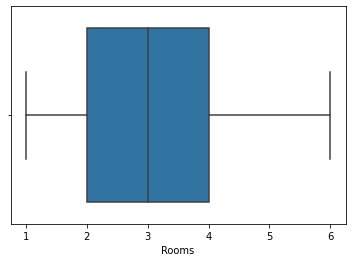

In [39]:
for i in df.columns:
    if i == 'Rooms':
        bp = sns.boxplot(data=df ,x=df[i])
        plt.show()

In [40]:
df.select_dtypes("object").nunique()

Type          3
Regionname    8
dtype: int64

In [41]:
X = df[['Type','Regionname']]
X.shape

(34790, 2)

In [42]:
ohe = OneHotEncoder(use_cat_names=True)
X = ohe.fit_transform(X)
X.head()

,Type_h,Type_u,Type_t,Regionname_Northern Metropolitan,Regionname_Western Metropolitan,Regionname_Southern Metropolitan,Regionname_Eastern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Victoria,Regionname_Western Victoria,Regionname_nan
0,1,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0


In [43]:
df

,Rooms,Type,Price,Distance,Car,Lattitude,Longtitude,Regionname
0,2,h,1.050173e+06,2.5,1.000000,-37.801400,144.995800,Northern Metropolitan
1,2,h,1.480000e+06,2.5,1.000000,-37.799600,144.998400,Northern Metropolitan
2,2,h,1.035000e+06,2.5,0.000000,-37.807900,144.993400,Northern Metropolitan
3,3,u,1.050173e+06,2.5,1.000000,-37.811400,145.011600,Northern Metropolitan
4,3,h,1.465000e+06,2.5,0.000000,-37.809300,144.994400,Northern Metropolitan
...,...,...,...,...,...,...,...,...
34851,4,h,1.480000e+06,6.3,3.000000,-37.810530,144.884670,Western Metropolitan
34852,2,h,8.880000e+05,6.3,1.000000,-37.815510,144.888260,Western Metropolitan
34853,2,t,7.050000e+05,6.3,2.000000,-37.822860,144.878560,Western Metropolitan
34854,3,h,1.140000e+06,6.3,1.728825,-37.810635,145.001842,Western Metropolitan


In [44]:
df.drop(columns=['Type','Regionname'],inplace=True)
df = pd.concat([df,X],axis=1)
df

,Rooms,Price,Distance,Car,Lattitude,Longtitude,Type_h,Type_u,Type_t,Regionname_Northern Metropolitan,Regionname_Western Metropolitan,Regionname_Southern Metropolitan,Regionname_Eastern Metropolitan,Regionname_South-Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Victoria,Regionname_Western Victoria,Regionname_nan
0,2,1.050173e+06,2.5,1.000000,-37.801400,144.995800,1,0,0,1,0,0,0,0,0,0,0,0
1,2,1.480000e+06,2.5,1.000000,-37.799600,144.998400,1,0,0,1,0,0,0,0,0,0,0,0
2,2,1.035000e+06,2.5,0.000000,-37.807900,144.993400,1,0,0,1,0,0,0,0,0,0,0,0
3,3,1.050173e+06,2.5,1.000000,-37.811400,145.011600,0,1,0,1,0,0,0,0,0,0,0,0
4,3,1.465000e+06,2.5,0.000000,-37.809300,144.994400,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34851,4,1.480000e+06,6.3,3.000000,-37.810530,144.884670,1,0,0,0,1,0,0,0,0,0,0,0
34852,2,8.880000e+05,6.3,1.000000,-37.815510,144.888260,1,0,0,0,1,0,0,0,0,0,0,0
34853,2,7.050000e+05,6.3,2.000000,-37.822860,144.878560,0,0,1,0,1,0,0,0,0,0,0,0
34854,3,1.140000e+06,6.3,1.728825,-37.810635,145.001842,1,0,0,0,1,0,0,0,0,0,0,0


In [45]:
df.shape

(34790, 18)